## Background on Binding Regimes
***Copied Exaclty From Source***: https://elifesciences.org/articles/57264#equ5

The most common approach to measuring affinity is to vary the concentration of one component, while keeping the concentration of the other binding partner constant. 

In the first, ***‘binding’ regime***, the concentration of the constant (‘trace’) component, **R**, is well below the dissociation constant ([R]total << KD). In this case, the concentration of the variable component (**P**) that gives half binding is equal to the KD. In the other, **‘titration’ regime**, the concentration of the constant component is much greater than the KD ([R]total >> KD) so that essentially all added P is depleted from solution due to binding to R, until there is no more free R left to bind. In this case, the concentration of P that gives half binding does not equal or even approximate the KD. Rather, at high excess of R over the KD, the concentration of P that gives half binding is simply half of the concentration of (active) R molecules—a value that can differ from the sought-after KD by orders of magnitude.

A potentially useful ***intermediate regime** exists between the two extremes, with limiting component concentrations similar to or in modest excess over the KD. The KD can be determined in this regime by using an appropriate binding equation, although with potential pitfalls . 

Where does the intermediate regime end and titration begin? The answer depends on the technique and the quality of the data. For ITC measurements, which provide highly precise information for each added binding aliquot, up to 1000-fold excess of the limiting species over the measured KD can be acceptable (Velázquez-Campoy et al., 2004). However, in most other cases, this limit is much lower. Simulations  suggest that up to ~10-fold excess consistently allows for reasonably well-defined KD values in the presence of typical binding data, and up to 100-fold excess can be useful for data with minimal noise. In contrast, performing the experiments in the binding regime (fit with Equation 4b) yields well-defined KD values even with substantial noise in the data.

the quadratic binding equation enables KD determination for binding reactions in the intermediate regime

### Distinguishing between concentration regimes

The challenge is that distinguishing between the regimes requires the knowledge of the KD, and consequently it is impossible to know a priori which regime holds. A useful rule of thumb for avoiding the titration regime is to always maintain the concentration of the excess binding partner significantly above that of the trace limiting partner.

### Equations

        fraction_bound = P_free / (P_free + kd)

Here [P]free is the unbound protein concentration and KD is simply the free protein concentration at which half of the RNA is bound. But while Equation 4a holds universally, in practice we only know the total concentration of P, [P]total—how much we added to the solution—not the free concentration ([P]free). Therefore, we want to operate under simplifying conditions where [P]free ≈ [P]total so that we can substitute [P]total into Equation 4a to give Equation 4b:

        fraction_bound = P_total / (P_total + kd)
        (hyperbolic equation 4)
        
The condition [P]free ≈ [P]total holds true if P is in large excess of RNA across the entire experiment, meaning that only a small fraction of total protein is used up by binding to RNA. Most importantly, this condition must hold for the protein concentration that gives half-saturation to determine the KD; hence the requirement for the binding regime that the concentration of the limiting component must be <<KD. 

In principle, a more complex quadratic binding equation provides an alternative to working under the [P]free ≈ [P]total assumption, as it explicitly accounts for bound protein:

    Fraction bound = [([R]total+ [P]total + KD) − sqrt(([R]total+ [P]total + KD)^2− (4 × [R]total × [P]total))] / (2×[R]total)
    (quadratic binding equation 5)
    
Importantly, the quadratic equation is only applicable to the intermediate and binding regimes, but not the titration regime. 



In [1]:
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt

### Binding regime
for case where [R] is << KD <br>
R is the constant component. <br>
P is the coponent being titrated. <br>

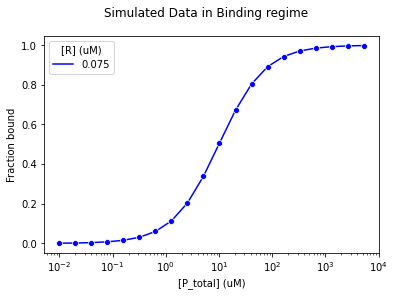

In [40]:
# for case where [Ligand] is << KD
kd = 10e-6
R_ligand = [0.075e-6] # use this approximation if [Ligand] is << KD
P_start = 0.01e-6
unit = 1e-6 # concentration in uM
unit_label = 'uM'

# generated similated data
data=[]

for conc in R_ligand:
    for i in range(20):
        P_total = 2 ** i * P_start 
        fraction_bound = P_total / (P_total + kd)
        data.append([round(conc/unit,4), P_total/unit,fraction_bound])

# convert data to dataframe
df_data = pd.DataFrame(data, columns=['[R]','[P_total]','Fraction bound'])

# plot data
fig, ax = plt.subplots()
fig.suptitle('Simulated Data in Binding regime')


sns.lineplot(ax=ax, data=df_data, x='[P_total]', y='Fraction bound', hue='[R]', marker="o", palette='winter')
ax.set_xscale('log')
ax.set_xlabel(xlabel='[P_total] ({})'.format(unit_label))
ax.legend(title='[R] ({})'.format(unit_label))


### Binding or Intermediate regime
for case when [R]total ~ Kd <br>
R is the constant component. <br>
P is the coponent being titrated. <br>


Fraction bound = [(R_total + P_total + kd)  - sqrt((R_total + P_total + kd)^2 ) - (4 x R_total x P_total  ))] / (2 x R_total)

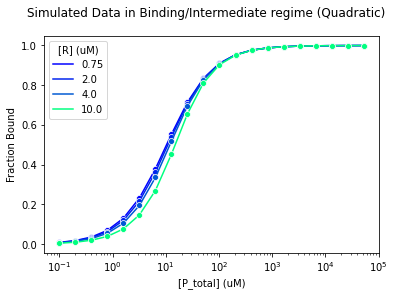

In [38]:
# here we vary the concentration of the constant component (R)

kd = 10e-6
R_ligand = [0.75e-6, 2e-6, 4e-6, 10e-6] # use this approximation if [Ligand] is << KD
P_start = 0.1e-6
unit = 1e-6 # concentration in uM
unit_label = 'uM'
data=[]
for conc in R_ligand:
    for i in range(20):
        P_total = 2 ** i * P_start
        R_total = conc
        fraction_bound = ((R_total + P_total + kd)  -  (math.sqrt((R_total + P_total + kd)**2 - (4* R_total * P_total  )))) / (2*R_total)
        data.append([round(conc/unit,2), P_total/unit , fraction_bound])

    
df_data = pd.DataFrame(data, columns=['[R]','[P_total]','Fraction Bound'])

# plot data
fig, ax = plt.subplots()
fig.suptitle('Simulated Data in Binding/Intermediate regime (Quadratic)')

#splot = sns.scatterplot(data=df_data, x='[P_total]', y='Fraction Bound',hue='[R]')
sns.lineplot(ax=ax, marker='o', data=df_data, x='[P_total]', y='Fraction Bound',hue='[R]', palette='winter')
ax.set_xscale('log')
ax.set_xlabel(xlabel='[P_total] ({})'.format(unit_label))
ax.legend(title='[R] ({})'.format(unit_label))

#df_data   

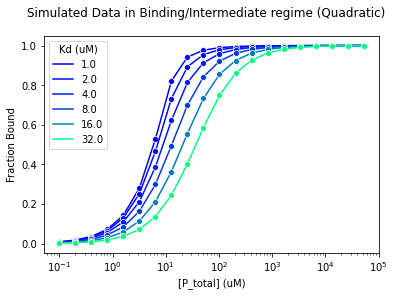

In [39]:
# here we vary the Kd

kd_list = [1e-6,2e-6,4e-6,8e-6,16e-6,32e-6]
R_ligand = 10e-6 
P_start = 0.1e-6
unit = 1e-6
unit_label = 'uM'

data=[]
for kd in kd_list:
    for i in range(20):
        P_total = 2 ** i * P_start
        R_total = R_ligand
        fraction_bound = ((R_total + P_total + kd)  -  (math.sqrt((R_total + P_total + kd)**2 - (4* R_total * P_total  )))) / (2*R_total)
        data.append([round(kd/unit, 2), P_total/unit , fraction_bound])

    
df_data = pd.DataFrame(data, columns=['Kd','[P_total]','Fraction Bound'])

# plot data
fig, ax = plt.subplots()
fig.suptitle('Simulated Data in Binding/Intermediate regime (Quadratic)')

sns.lineplot(ax=ax, marker='o', data=df_data, x='[P_total]', y='Fraction Bound',hue='Kd', palette='winter' )
ax.set_xscale('log')
ax.set_xlabel(xlabel='[P_total] ({})'.format(unit_label))
ax.legend(title='Kd ({})'.format(unit_label))
